# Regressão Linear

Aula prática de regressão linear.
O objetivo é prever o custo da diária de um imóvel baseado ao número de pessoas



### Importando bibliotecas

In [ ]:
# importando as bibliotecas
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos
import seaborn as sns # biblioteca para gráficos
import numpy as np #funções matemáticas de alto nível
from sklearn.metrics import mean_squared_error, mean_absolute_error



### Coletando dados

In [ ]:
custo_diaria = pd.read_csv('./custo_diaria.csv', sep= ';')

FileNotFoundError: [Errno 2] No such file or directory: './custo_diaria.csv'

### Analisando os dados coletados

In [ ]:
#visualizando arquivos da base de dados
custo_diaria.head()

In [ ]:
#Gerando algumas estatisticas da base de dados
custo_diaria.describe()

In [ ]:
# Verificando se existe algum valor nulo ou ausente
custo_diaria.isna().sum()

In [ ]:
# Verificando informações da base de dados
custo_diaria.info()

### Analise de correlação entre as variáveis

- Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, possuem uma relação direta.

- Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa.

In [ ]:
custo_diaria.corr()

### Analise gráfica da correlação entre as variáveis

In [ ]:
correlacao = custo_diaria.corr()
plot = sns.heatmap(correlacao, annot=True)
plot

Perceba que temos uma correlçao forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta.
Além disso, podemos dizer que em 98% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.


## Tratamento de dados
Nesta etapa, vamos preparar os dados para serem utilizados no modelo de Regressão Linear. Essa transformação deve ser realizada para que os dados possam ter o formato que o algoritmo solicitada como entrada.

### Criando variável independente - X
Coletamos todos os registros da primeira coluna e convertemos no formato de array

In [ ]:
X = custo_diaria.iloc[:,0].values
print(X)

A função iloc permite selecionar um conjunto de registros. o dois pontos ":" significa que estamos selecionando todos os regisros e zero "0" a primeira coluna

### Criando variável dependente - y (o que queremos predizer)

In [ ]:
#criando variável dependente (o que queremos predizer)
y = custo_diaria.iloc[:,1].values
print(y)

### Verificando tipo de variáveis

In [ ]:
type(X)

In [ ]:
type(y)

In [ ]:
X.shape

### Transformando array em matriz

In [ ]:
X = X.reshape(-1,1)
X

In [ ]:
# Agora nós temos uma matriz com duas colunas.
X.shape

# Criando modelo de Machine Learning - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
# cria um objeto do tipo regressão linear
predicao_custo_diaria = LinearRegression()

In [ ]:
type(predicao_custo_diaria)

# Realizando o Treinamento do modelo

In [ ]:
predicao_custo_diaria.fit(X, y)

## Calculando a constante alfa - intercept

In [ ]:
predicao_custo_diaria.intercept_

## Calculando a o coeficiente angular da reta - coef

In [ ]:
predicao_custo_diaria.coef_

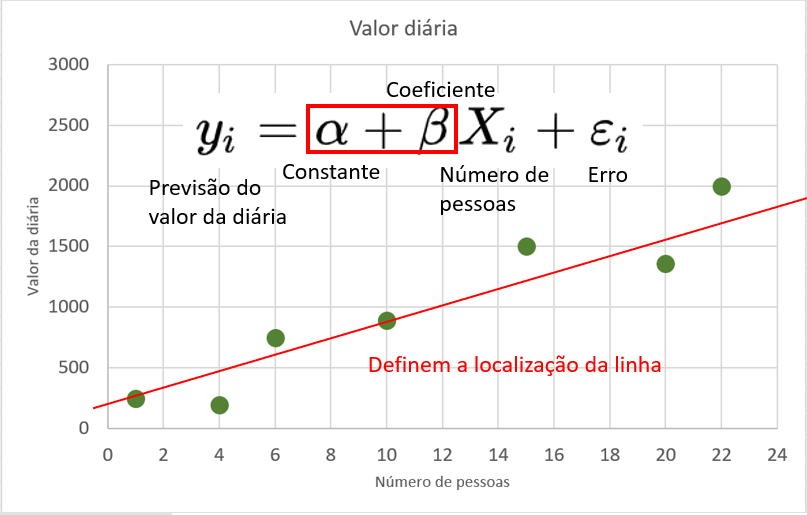

## Realizando a predição dos valores das diárias

Baseado no número de pessoas, vamos estimar/prever o custo do imóvel alugado

In [ ]:
previsao_valores = predicao_custo_diaria.predict(X)

In [ ]:
#visualiza das previsões para cada nª de pessoas
previsao_valores

# Visualizando no gráfico as disposições dos dados
Para visualizar os dados no grafico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [ ]:
# Verificando tipo da variável X_custo_diaria
X

In [ ]:
X = X.ravel() # transforma em um vetor
X

In [ ]:
y

In [ ]:
grafico = px.scatter(x = X , y = y)
grafico.show()

In [ ]:
grafico = px.scatter(x = X, y = y)
grafico.add_scatter(x = X, y = previsao_valores, name= 'previsões')
grafico.show()

### Calculando o valor da diária de acordo com a Equação Linear

- 𝑦_𝑖 = 𝑃𝑟𝑒v𝑖𝑠ã𝑜 𝑑𝑜 𝑝𝑟𝑒ç𝑜 𝑑𝑎 𝑑𝑖á𝑟𝑖𝑎.
- 𝛼 = 𝐶𝑜𝑛𝑠𝑡𝑎𝑛𝑡𝑒.
- 𝛽 = 𝐶𝑜𝑒𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑒 𝑑𝑒 𝑖𝑛𝑐𝑙𝑖𝑛𝑎çã𝑜 𝑑𝑎 𝑟𝑒𝑡𝑎.
- 𝑋_𝑖 = 𝑁ú𝑚𝑒𝑟𝑜 𝑑𝑒 𝑝𝑒𝑠𝑠𝑜𝑎𝑠.
- 𝜀_𝑖 = 𝐸𝑟𝑟𝑜.


In [ ]:
# Verificando os valores de um determinada previsão baseada na quantidade de pessoas

alfa = predicao_custo_diaria.intercept_
beta = predicao_custo_diaria.coef_
Xi = 8

alfa + beta * Xi

## Calculando o valor da diária através da função predict do modelo

In [ ]:
# Verificando de modo direto
predicao_custo_diaria.predict([[8]])

# Avaliação do modelo


In [ ]:
# Calculando a acurácia do modelo
predicao_custo_diaria.score(X.reshape(-1,1), y)

### Calculando o Mean absolut error


In [ ]:
mean_absolute_error(y, previsao_valores)

### Calculando o Mean squared error!


In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y, previsao_valores)
print(MSE)

### Calculando o Root Mean squared error

In [ ]:
np.sqrt(MSE)